In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('rainfall/austin_weather.csv')
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [6]:
#drop usless column
data = data.drop(["Date", "Events", "SeaLevelPressureLowInches"], axis = 1)

In [7]:
data.replace('T', 0.0)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [11]:
# Fonction pour vérifier si une valeur est numérique
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Appliquer la fonction à chaque élément du DataFrame
non_numeric_mask = data.applymap(lambda x: not is_numeric(x))

# Filtrer les valeurs non numériques
non_numeric_values = data[non_numeric_mask]

# Afficher les valeurs non numériques et leurs positions
for col in non_numeric_values.columns:
    for row in non_numeric_values.index:
        if non_numeric_mask.loc[row, col]:
            print(f"Valeur non numérique trouvée à la position (Row: {row}, Column: {col}): {data.loc[row, col]}")

C:\Users\PDG Junior\AppData\Local\Temp\ipykernel_11356\3731352624.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_mask = data.applymap(lambda x: not is_numeric(x))


Valeur non numérique trouvée à la position (Row: 174, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 175, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 176, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 177, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 596, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 597, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 598, Column: DewPointHighF): -
Valeur non numérique trouvée à la position (Row: 174, Column: DewPointAvgF): -
Valeur non numérique trouvée à la position (Row: 175, Column: DewPointAvgF): -
Valeur non numérique trouvée à la position (Row: 176, Column: DewPointAvgF): -
Valeur non numérique trouvée à la position (Row: 177, Column: DewPointAvgF): -
Valeur non numérique trouvée à la position (Row: 596, Column: DewPointAvgF): -
Valeur non numérique trouvée à la position (R

In [15]:
data = data.replace('-', 0.0)

In [21]:
data.replace('T', 0.0, inplace = True)

In [22]:
data.to_csv("austin_weather_final.csv", index=False)

In [23]:
df = pd.read_csv("austin_weather_final.csv")
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00


In [26]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
#define x et y, respectivement variable independante et dependante
X = df.drop(['PrecipitationSumInches'], axis=1)

In [32]:
Y = df['PrecipitationSumInches']

In [33]:
#reshaping Y into 2d vector
Y =Y.values.reshape(-1, 1)

In [50]:
day_index = 793
days = [i for i in range(Y.size)] #list comprehension


In [51]:
#linearregression initialisation
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

The precipitation trend graph


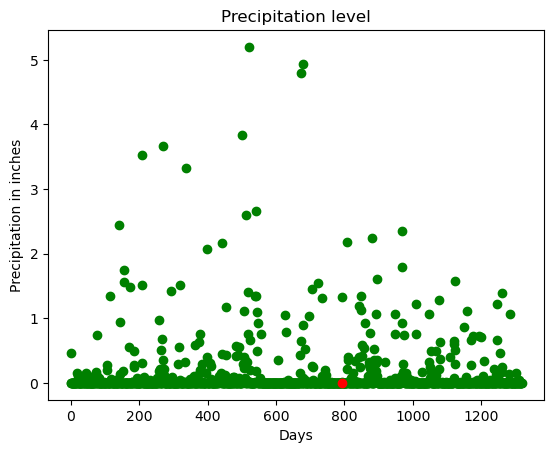

In [56]:
#plot graph of precipitation at day_index and others days store in the list days
print("The precipitation trend graph")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index] , Y[day_index] , color = 'r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

#filter specific columns of a DataFrame
x_vis = X.filter(['tempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'],)


The precipitation vs attributes trend graph


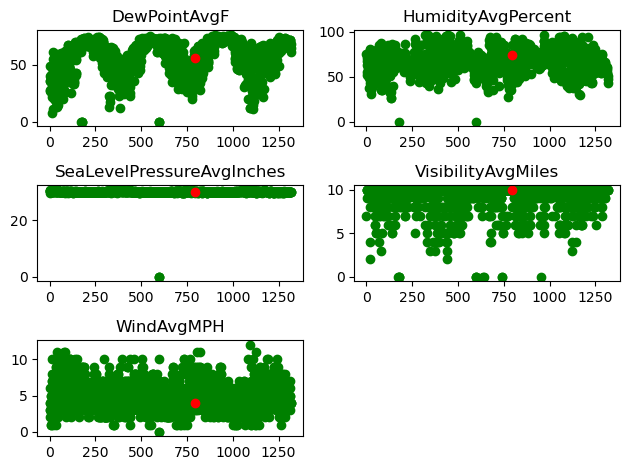

In [63]:
#Use subplot to compare
print('The precipitation vs attributes trend graph')
for i in range(x_vis.columns.size):
    plt.subplot(3,2, i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index] , x_vis.iloc[day_index, i], color='r')
    plt.title(x_vis.columns.values[i])

plt.tight_layout() # Adjust subgraphs to fit well
plt.show()

In [6]:
data.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')